In [1]:
# visualization for new inverse problem
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
from MlflowHelper import *
from DensePoisson import *
from PlotHelper import *
import mlflow
from DataSet import DataSet

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#0072BD', '#D95319',  '#7E2F8E', '#77AC30', '#4DBEEE', '#A2142F', '#EDB120'])



In [2]:
exp_name = 'p1-D2-var0.1'

In [3]:

tmp = f'{exp_name}:basic_dat9-res1_N10_var0.05'
opts, artifacts = load_artifact(name_str = tmp)

pde  = create_pde_problem(**opts['pde_opts'])

ds = DataSet()
ds.readmat(artifacts['dataset.mat'])

In [4]:
model1,_ = load_model(name_str = f'{exp_name}:basic_dat9-res1_N10_var0.05')
model2,_ = load_model(name_str = f'{exp_name}:basic_dat1-res9_N10_var0.05')
model3,_ = load_model(name_str = f'{exp_name}:inv_ff_N10_var0.05')





Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/198112603627853598/fdcbe464f146481f826df04951c468f2/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/198112603627853598/c63fc2afbc73462798ae66df7d3bc771/artifacts/net.pth
Using Fourier Features
net loaded from /home/ziruz16/adjointpinn/mlruns/198112603627853598/eb6450081ddc4122a345c65b02d541cd/artifacts/net.pth


In [6]:
def plot_prediction(net, pde, dataset):
    x_test = dataset['x_res_test']

    u_test = net(x_test)
    
    u_exact_test = pde.u_exact(x_test, pde.exact_D)

    # excat u with predicted D, for comparison
    u_exact_pred_D_test = pde.u_exact(x_test, net.D.item())

    x_res_train = dataset['x_res_train'].detach()
    u_pred = net(x_res_train).detach()
    u_res = dataset['u_res_train'].detach()

    # visualize the results
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    
    
    # scatter plot of training data
    ax.plot(x_res_train.cpu().numpy(), u_res.cpu().numpy(), '.', label='noisy data',markersize=10,color='black')
    # plot exact solution
    ax.plot(x_test.cpu().numpy(), u_exact_test.cpu().numpy(), label='GT')
    # plot nn prediction
    ax.plot(x_test.cpu().numpy(), u_test.cpu().detach().numpy(), label='PINN prediction')
    # sol with inferred D
    ax.plot(x_test.cpu().numpy(), u_exact_pred_D_test.cpu().numpy(), label='sol w/ inferred D',linestyle='--',color='black')
    
    
    
    

    ax.axis('equal')
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    
    lgs = ax.legend(loc="upper right", fontsize=14)
    for line in ax.lines:
        line.set_linewidth(2)
    for legend_line in lgs.get_lines():
        legend_line.set_linewidth(2)

    return fig, ax

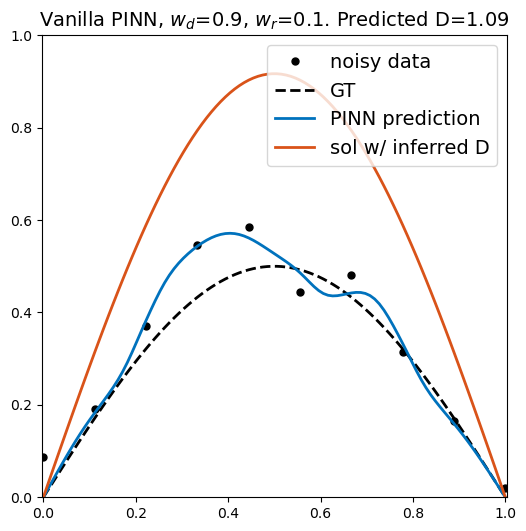

In [7]:

saveopt = {'dpi':100, 'bbox_inches':'tight'}

fig, ax = plot_prediction(model1, pde, ds)

ax.set_title(r'Vanilla PINN, $w_{d}$=0.9, $w_{r}$=0.1. Predicted D=1.09', fontsize=14)


fig.savefig('figs/fig_pred_dat1_res9.png', **saveopt)



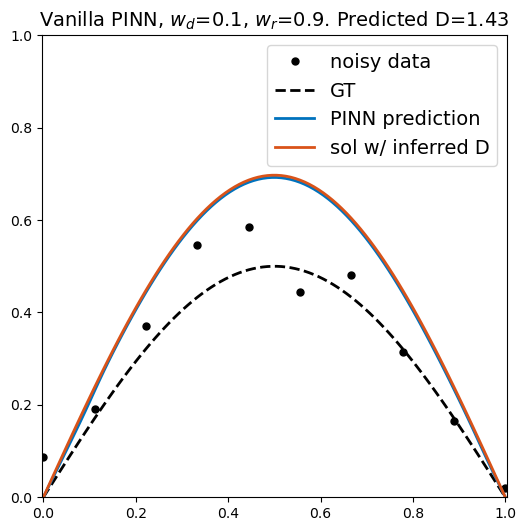

In [8]:
fig, ax = plot_prediction(model2, pde, ds)
ax.set_title(r'Vanilla PINN, $w_{d}$=0.1, $w_{r}$=0.9. Predicted D=1.43', fontsize=14)
fig.savefig('figs/fig_pred_dat9_res1.png', **saveopt)

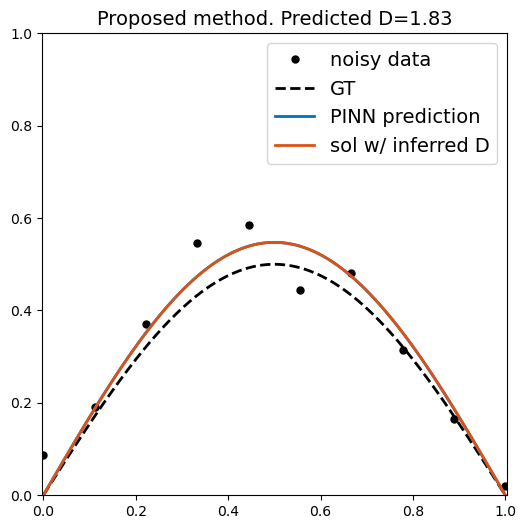

In [9]:
fig, ax = plot_prediction(model3, pde, ds)
ax.set_title(r'Proposed method. Predicted D=1.83', fontsize=14)
fig.savefig('figs/fig_pred_inv.png', **saveopt)